# APP RECOMMENDATION SYSTEM- SAKSHI MORE

this data analysis is done by - Sakshi More

It contains a downloaded dataset from kaggle.com

Aims at building a recommendation system for google playstore apps

In [1]:
#importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

importing the data sets
this data contains all the decription of the app on google playstore

In [2]:
data=pd.read_csv("C:/Users/Sakshi more/OneDrive/Desktop/googleplaystore.csv")

this dataset contains description about the app in terms of ratings,size,price,etc....

In [3]:
#displaying teh first 5 rows using the head method
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


displaying all the columns in the data

In [4]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

finding the shape of the data

In [5]:
data.shape

(10841, 13)

this tells us that the data contains 10841 rows and 13 columns

lets check the unique categories in the data

In [6]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

visually finding the number of apps in each category


can be done with the help of bar chart

<AxesSubplot:title={'center':'Category-wise count of apps'}>

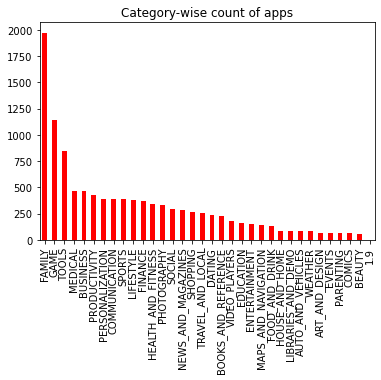

In [7]:
data['Category'].value_counts().plot(kind='bar',color='red',title='Category-wise count of apps')

the above bar graph shows that highest number of apps are family apps

In [8]:
#to check if the data contains any NaN values
data.isna().any()

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

this analysis shows that some columns contains NaN Values
lets replace this NaN values with 0 so that it does not cause any difficulty in data anaylsis process further


In [9]:
data.fillna(0,inplace=True)

now again checking for NaN values after making changes

In [10]:
data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [11]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


now with the help of the pie chart lets find the count of apps that are free and ones that are paid

<AxesSubplot:title={'center':'Paid v/s Free Apps'}, ylabel='Type'>

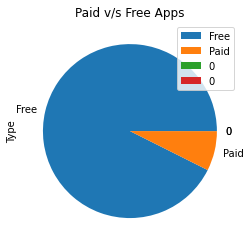

In [12]:
data['Type'].value_counts().plot(kind='pie',legend=True,title='Paid v/s Free Apps')

this pie chart indiactes that most of the apps are free on google playstore

lets see what age groups people do ratings for the content of the app

<AxesSubplot:title={'center':'Content Rating of Apps'}>

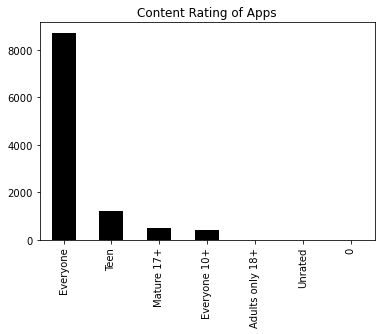

In [13]:
data['Content Rating'].value_counts().plot(kind='bar',title='Content Rating of Apps',color='black')

#this shows that their is no specificity of age groups in rating
#all age group people do ratings

                               LETS BUILD A RECOMMENDATION SYSTEM FOR APPS

there are 2 recommendation systems


1- based on rating
2- based on category

1.app recommendation system based on the rating of the app

In [14]:
from ipywidgets import interact
@interact(x=data['Rating'].unique())
def Apps(x):
    recommended_apps=data.loc[data['Rating']==x]
    print('The recommended apps with ',x,' ratings are: \n',recommended_apps['App'].head())

interactive(children=(Dropdown(description='x', options=(4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0…

2.app recommendation based on category

In [15]:

@interact(y=data['Category'].unique())
def Apps(y):
        Recommended_Apps=data.loc[data['Category']==y]
        print('The recommended apps of category : ',y,' are \n',Recommended_Apps['App'].head())

interactive(children=(Dropdown(description='y', options=('ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOO…

# CONCLUSION

1. Succesfully loaded the data

2.Performed some data analysis on it

3.I built 2 recommendation systems here

# BASED ON RATING

--in this recommendation system using the interact i created a dropdown for the ratings
--so based on the rating the user selects there will suggestion of similar apps to the user
--by default i have written the code in such a way that it displays only 5 recommendation
--this can be changed by specifying the number of suggestion you want in the head paranthesis

# BASED ON CATEGORY

--in this recommendation system using the interact i created a dropdown for the categories
--so based on the category the user selects there will suggestion of similar apps to the user
--by default i have written the code in such a way that it displays only 5 recommendation
--this can be changed by specifying the number of suggestion you want in the head paranthesis